In [1]:
from file_hopping import Txt_hop
%matplotlib inline
from graph_hop import Graph_hop
import numpy as np

# 5bs_hop-constposition

In [2]:
# directory name
dir_name = "P5bp_3bs_hop/5cp"
# molecule name is a number in these experimets
number = "5"

In [3]:
file = Txt_hop(dir_name, number, "hopcp", first_time_molecule=False)
dataFrame = file.bricolage()

In [4]:
dataFrame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.5594,-0.0468,24.18210,3.8085,26248.85156
1,0.6589,0.0702,23.95740,3.6452,26248.85352
2,-0.3044,-0.0845,24.44130,3.7731,26248.85352
3,-0.0426,-0.0091,23.88150,3.8842,26248.85547
4,-0.5487,0.0625,23.84730,3.8001,26248.85352
...,...,...,...,...,...
87578,-0.6673,-0.3861,65.03815,4.0559,26467.83594
87579,-0.0007,-0.2788,65.24970,4.1519,26467.83594
87580,0.1406,-0.2411,64.96500,4.1771,26467.83789
87581,-0.3620,-0.3194,64.60230,4.0408,26467.83984


In [5]:
forces_average = []
forces_average_std = []
w_U = []
w_N = []
sigma_w_U = []
sigma_w_N = []
native_time = []
unfolded_time = []
def mean(mu1, mu2):
    return (mu1+mu2)/2

def err_prop_mean(sigma1, sigma2):
    return np.sqrt(sigma1**2+sigma2**2)/2

# File 1

f media vale = 3.9222433828805725, con deviazione standard = 0.33996786478664665


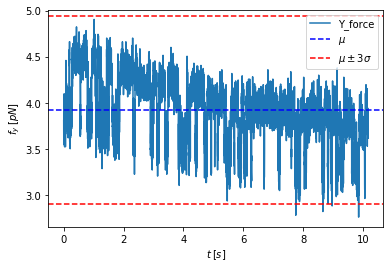

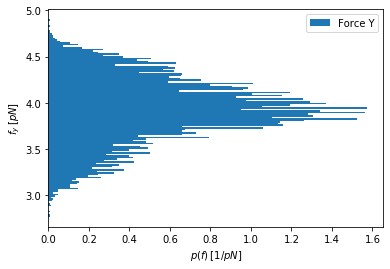

In [6]:
grafici = Graph_hop(dir_name, number, 1)
data_frame = grafici.do_graph()
# (2.4440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

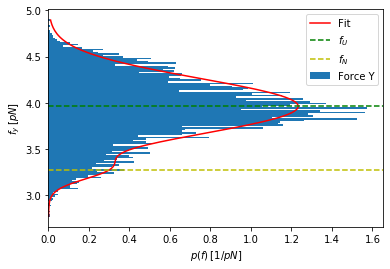

c_1 = 1.2335265415949042, mu_1 = 3.9614480614709615, sigma_1 = 0.30188477117222134
c_2 = 0.2093111421364922, mu_2 = 3.275594955385105, sigma_2 = 0.11401826358798872
sigma_c_1 = 0.028252095161853275, sigma_mu_1 = 0.008728759505288394, sigma_sigma_1 = 0.009909984761678786
sigma_c_2 = 0.04696834369179952, sigma_mu_2 = 0.03090265812835911, sigma_sigma_2 = 0.030691093088396668
w_U = 0.05982141815604821, sigma_w_U = 0.24424217075476962
w_N = 0.9334254503421691, sigma_w_N = 0.001685621469493629


In [7]:
prova = [2.2, 4., 0.3, 0.3, 3.5, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)

In [8]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

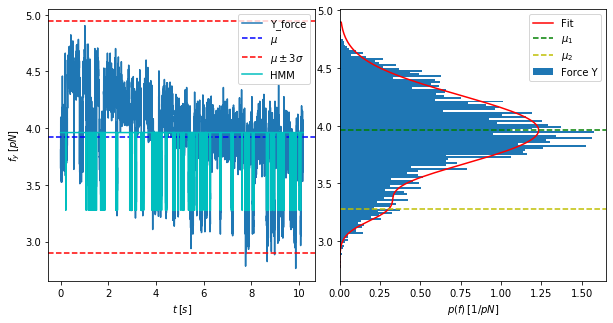

In [9]:
grafici.subplots(fitting_par)

In [10]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 8.532 sec nello stato nativo e 1.223 sec nello stato unfolded


In [11]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.5594,-0.0468,24.18210,3.8085,0.00000
1,0.6589,0.0702,23.95740,3.6452,0.00196
2,-0.3044,-0.0845,24.44130,3.7731,0.00196
3,-0.0426,-0.0091,23.88150,3.8842,0.00391
4,-0.5487,0.0625,23.84730,3.8001,0.00196
...,...,...,...,...,...
9750,-0.5766,-0.3281,23.69180,3.6385,10.16992
9751,-0.4405,-0.3948,23.61900,3.6267,10.16992
9752,-0.0950,-0.2991,23.79905,3.6620,10.16992
9753,0.0254,-0.2034,23.96170,3.6166,10.17188


# File 2

f media vale = 4.210732164576201, con deviazione standard = 0.3332277996283442


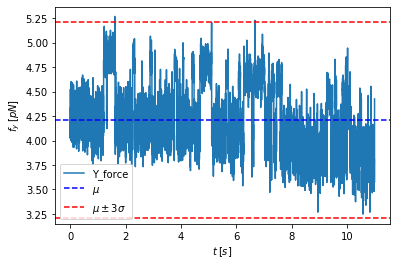

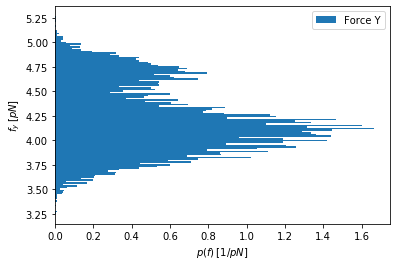

In [12]:
grafici = Graph_hop(dir_name, number, 2)
data_frame = grafici.do_graph(11)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

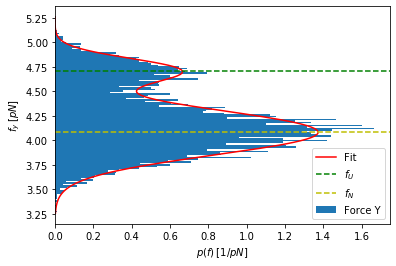

c_1 = 0.6303283110028284, mu_1 = 4.712113398456713, sigma_1 = 0.12709718562694344
c_2 = 1.3732420592629273, mu_2 = 4.081783342435649, sigma_2 = 0.23143113451136255
sigma_c_1 = 0.03299378790728046, sigma_mu_1 = 0.00882138060224409, sigma_sigma_1 = 0.009077745930530047
sigma_c_2 = 0.02443836811580299, sigma_mu_2 = 0.005237579452497637, sigma_sigma_2 = 0.0056518249033865806
w_U = 0.7966339577097322, sigma_w_U = 0.004334036306818474
w_N = 0.20081339653653946, sigma_w_N = 0.05047925371211641


In [13]:
prova = [0.4, 4.7, 0.1, 1.2, 4.1, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [14]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

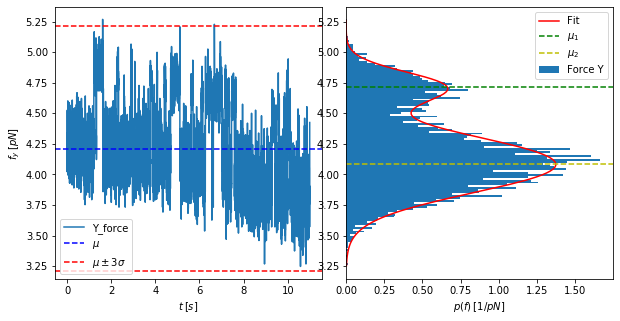

In [15]:
grafici.subplots(fitting_par, False)

In [16]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 2.512 sec nello stato nativo e 8.012 sec nello stato unfolded


In [17]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0568,-0.2063,55.62405,4.1418,0.00000
1,0.0359,-0.2614,55.16120,4.2024,0.00000
2,0.0097,-0.2585,55.32305,4.0223,0.00196
3,-0.0531,-0.1077,55.42720,4.1771,0.00196
4,0.3448,-0.0961,55.06095,4.0559,0.00391
...,...,...,...,...,...
10519,-0.0374,0.0750,55.29670,3.6721,10.99219
10520,0.1074,0.2133,54.76395,3.6250,10.99415
10521,0.5489,0.1823,55.29440,3.7529,10.99610
10522,0.1720,0.1156,55.01600,4.2882,10.99805


# File 3

f media vale = 4.143286244789697, con deviazione standard = 0.2904123522191045


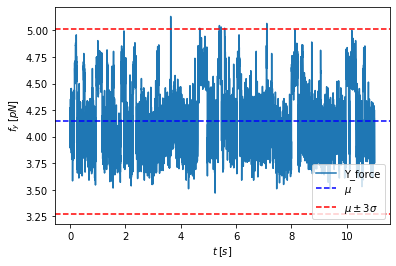

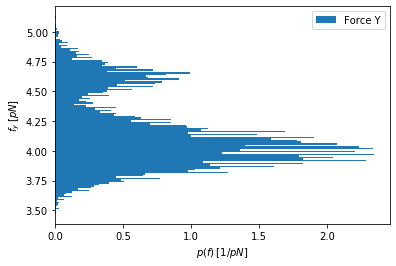

In [18]:
grafici = Graph_hop(dir_name, number, 3)
data_frame = grafici.do_graph(11)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

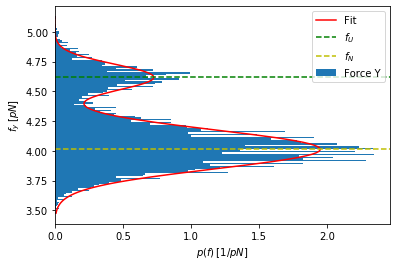

c_1 = 0.7264062487197431, mu_1 = 4.618760980700957, sigma_1 = 0.10974380950824345
c_2 = 1.952473830466263, mu_2 = 4.012508264798951, sigma_2 = 0.16265906575158073
sigma_c_1 = 0.06050192938591556, sigma_mu_1 = 0.010832355791993025, sigma_sigma_1 = 0.010839185323243392
sigma_c_2 = 0.04869947438917753, sigma_mu_2 = 0.004743105196441754, sigma_sigma_2 = 0.004817271384717958
w_U = 0.7960739805479691, sigma_w_U = 0.005796295401370942
w_N = 0.19982486916373207, sigma_w_N = 0.07708325188220122


In [19]:
prova = [0.7, 4.6, 0.1, 1.8, 4.0, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [20]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

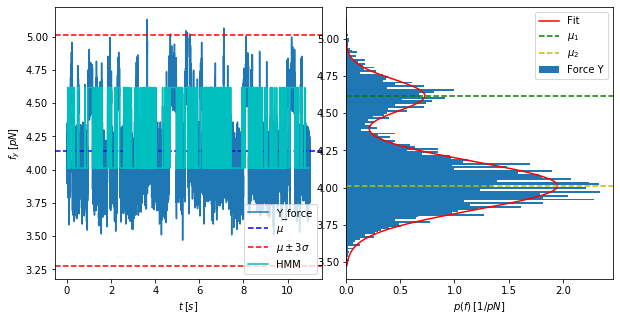

In [21]:
grafici.subplots(fitting_par)

In [22]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 2.2680000000000002 sec nello stato nativo e 8.288 sec nello stato unfolded


In [23]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.4128,0.1475,70.22640,4.1064,0.00000
1,0.8264,0.1591,70.44005,3.9751,0.00000
2,0.2191,0.1707,70.78085,3.8943,0.00195
3,0.4425,0.2210,70.39545,4.2310,0.00000
4,0.5611,0.3795,70.13420,4.1771,0.00391
...,...,...,...,...,...
10551,1.1265,0.2558,66.84415,4.0021,10.99609
10552,0.5332,0.0837,66.36950,4.0256,10.99609
10553,0.3866,0.0354,66.82280,4.2512,10.99609
10554,0.7217,0.1823,66.73725,4.1165,10.99805


# File 4

f media vale = 3.57057827946768, con deviazione standard = 0.260714874920911


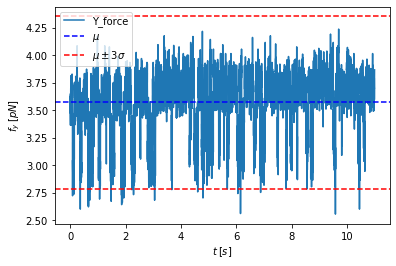

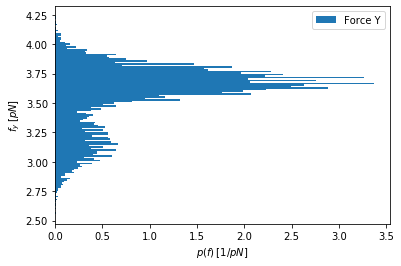

In [24]:
grafici = Graph_hop(dir_name, number, 4)
data_frame = grafici.do_graph(11)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

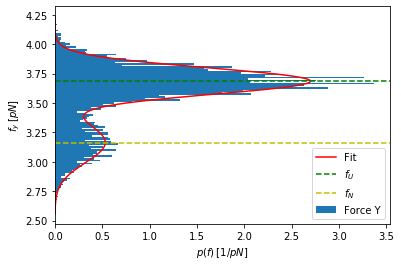

c_1 = 2.6963212125918665, mu_1 = 3.6859311762489835, sigma_1 = 0.11198193116889457
c_2 = 0.5313238262151405, mu_2 = 3.163468134226606, sigma_2 = 0.17092815629066124
sigma_c_1 = 0.058080960721280064, sigma_mu_1 = 0.0030910200384198588, sigma_sigma_1 = 0.003218612308600044
sigma_c_2 = 0.046766848051275026, sigma_mu_2 = 0.018656910320287986, sigma_sigma_2 = 0.019937153695857832
w_U = 0.22764747300503857, sigma_w_U = 0.07991371303567109
w_N = 0.756849477407781, sigma_w_N = 0.005894865129157235


In [25]:
prova = [2.5, 3.6, 0.1, 0.5, 3.2, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [26]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

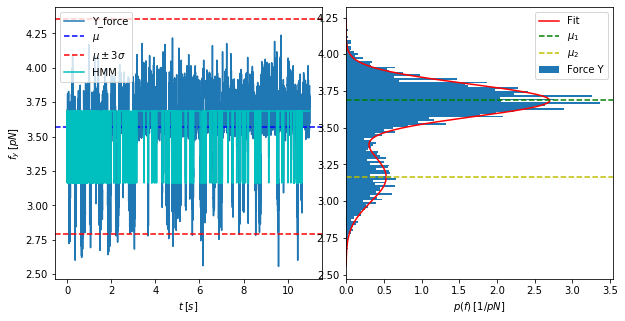

In [27]:
grafici.subplots(fitting_par)

In [28]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 7.998 sec nello stato nativo e 2.5220000000000002 sec nello stato unfolded


In [29]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0795,0.1282,34.43440,3.6452,0.00000
1,0.6519,0.0354,34.31250,3.6048,0.00000
2,0.6379,-0.0381,34.32445,3.5442,0.00196
3,0.6693,-0.0207,34.62430,3.5105,0.00196
4,0.4913,-0.1193,34.42005,3.5307,0.00391
...,...,...,...,...,...
10515,0.2872,-0.0961,35.06185,3.5964,10.99219
10516,0.4076,-0.0700,34.76975,3.7176,10.99414
10517,1.1038,0.0402,34.76320,3.7226,10.99414
10518,0.4652,0.1388,34.77375,3.8236,10.99805


# File 5

f media vale = 4.338043518606224, con deviazione standard = 0.274670342462196


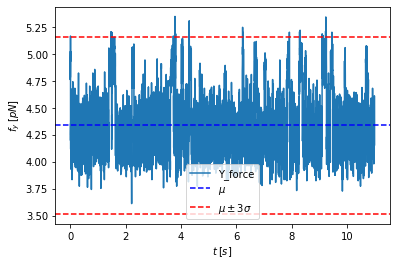

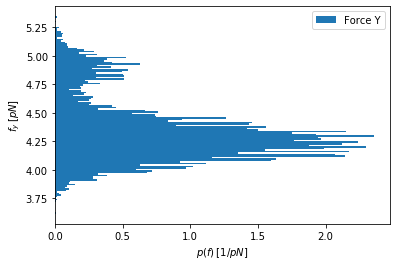

In [30]:
grafici = Graph_hop(dir_name, number, 5)
data_frame = grafici.do_graph(11)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

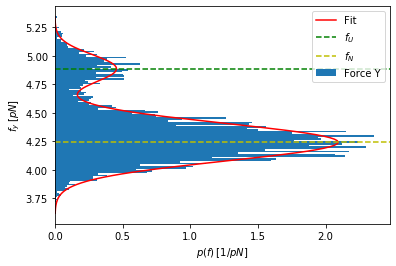

c_1 = 0.453960245223547, mu_1 = 4.887778163929194, sigma_1 = 0.12427596169992035
c_2 = 2.093064742860802, mu_2 = 4.241524210296347, sigma_2 = 0.16392814842407433
sigma_c_1 = 0.048322722050329045, sigma_mu_1 = 0.01560631150728534, sigma_sigma_1 = 0.015669683440910638
sigma_c_2 = 0.04136812725351046, sigma_mu_2 = 0.003790770516900843, sigma_sigma_2 = 0.0038366146499563044
w_U = 0.8600548116475105, sigma_w_U = 0.003248142690890571
w_N = 0.14141480815700821, sigma_w_N = 0.10640204168145086


In [31]:
prova = [0.5, 4.8, 0.1, 2., 4.2, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [32]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

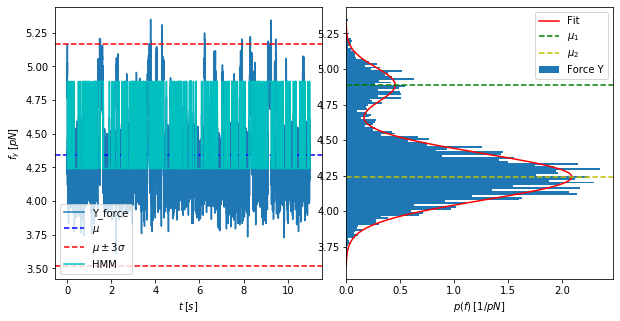

In [33]:
grafici.subplots(fitting_par)

In [34]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 1.6440000000000001 sec nello stato nativo e 8.917 sec nello stato unfolded


In [35]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.3866,-0.2208,64.01745,4.9599,0.00000
1,0.4006,-0.1695,63.56275,4.9245,0.00000
2,0.2470,-0.1038,64.27315,4.8909,0.00000
3,0.4390,-0.0787,63.91100,4.7629,0.00195
4,0.8264,-0.1077,64.23520,4.9043,0.00391
...,...,...,...,...,...
10556,0.6379,-0.0410,64.01555,4.3185,10.99414
10557,0.3291,0.0228,64.10765,4.4347,10.99414
10558,0.6013,0.0141,64.09805,4.4145,10.99609
10559,-0.0182,-0.0729,63.66395,4.2647,10.99609


# File 6

f media vale = 3.956459785700734, con deviazione standard = 0.3221762683377656


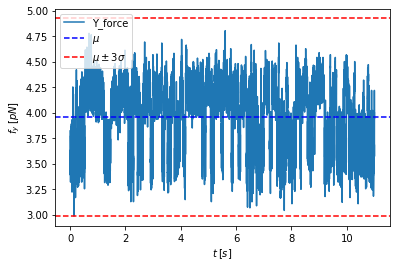

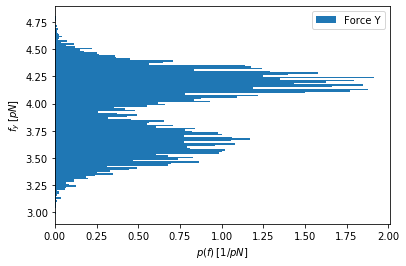

In [36]:
grafici = Graph_hop(dir_name, number, 6)
data_frame = grafici.do_graph(11)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

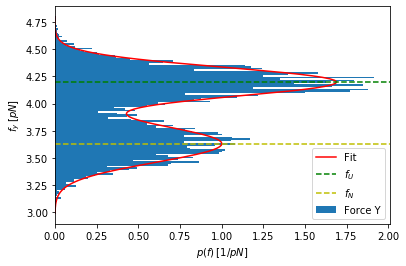

c_1 = 1.6867277995975891, mu_1 = 4.1986871735769595, sigma_1 = 0.1342314984551876
c_2 = 1.0018739495918483, mu_2 = 3.6309237283728555, sigma_2 = 0.17046829599949223
sigma_c_1 = 0.03986953042065672, sigma_mu_1 = 0.004019046440514053, sigma_sigma_1 = 0.0042594511256913966
sigma_c_2 = 0.03486803611611176, sigma_mu_2 = 0.007422580227839812, sigma_sigma_2 = 0.007833935137172536
w_U = 0.4281013905604331, sigma_w_U = 0.02366821065908018
w_N = 0.5675307209809408, sigma_w_N = 0.012187358939983654


In [37]:
prova = [1.7, 4.2, 0.1, 1., 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [38]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

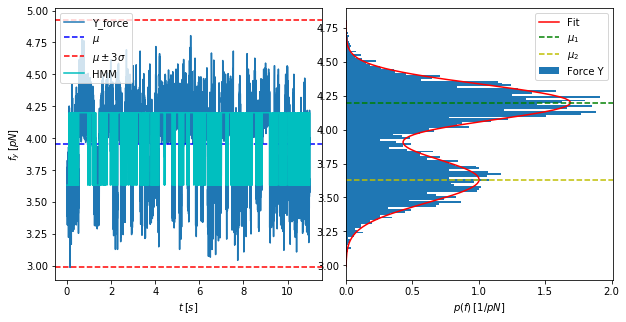

In [39]:
grafici.subplots(fitting_par)

In [40]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 6.025 sec nello stato nativo e 4.521 sec nello stato unfolded


In [41]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,1.0218,0.2403,42.23420,3.8203,0.00000
1,1.3080,0.1417,42.18325,3.7630,0.00195
2,1.3918,0.0663,42.37205,3.5307,0.00391
3,0.9101,0.0431,42.35340,3.5206,0.00391
4,0.2453,0.0025,42.09780,3.6267,0.00586
...,...,...,...,...,...
10541,-0.2573,0.2171,42.29115,4.0054,10.99414
10542,-0.9116,0.0808,41.94060,3.9398,10.99609
10543,-0.4719,0.1591,42.38605,4.2175,10.99609
10544,0.5332,0.2519,41.66890,3.5711,10.99805


# File 7

f media vale = 3.9142928605290788, con deviazione standard = 0.3351489671352958


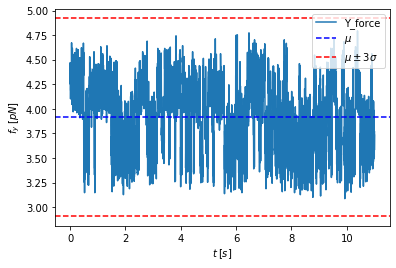

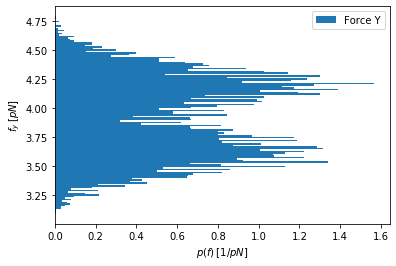

In [42]:
grafici = Graph_hop(dir_name, number, 7)
data_frame = grafici.do_graph(11)
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

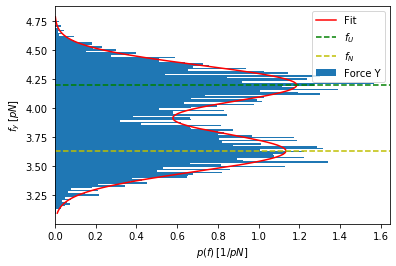

c_1 = 1.1808265438166976, mu_1 = 4.201566006041397, sigma_1 = 0.1675283816194129
c_2 = 1.1306526443042413, mu_2 = 3.627925094020893, sigma_2 = 0.1773854190669897
sigma_c_1 = 0.03740697280552526, sigma_mu_1 = 0.007770162610209674, sigma_sigma_1 = 0.00838176230995653
sigma_c_2 = 0.03546978567189278, sigma_mu_2 = 0.008269097704553374, sigma_sigma_2 = 0.008334771661562835
w_U = 0.502732608153978, sigma_w_U = 0.01943443367569241
w_N = 0.4958661179251275, sigma_w_N = 0.02029280354535564


In [43]:
prova = [1.4, 4.2, 0.2, 1.2, 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [44]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

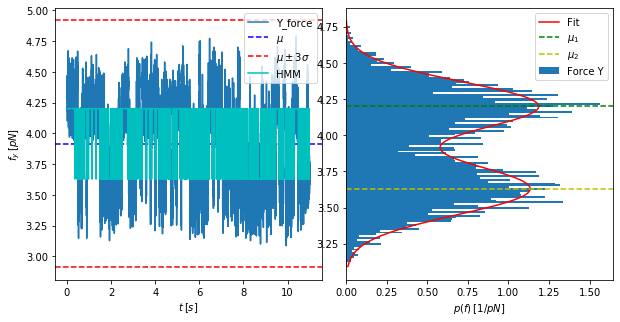

In [45]:
grafici.subplots(fitting_par)

In [46]:
native, unfolded = grafici.hmm_analysis(fitting_par)
native_time.append(native)
unfolded_time.append(unfolded)

La molecola si trova 5.273 sec nello stato nativo e 5.274 sec nello stato unfolded


In [47]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.1683,0.0460,65.94520,4.3791,0.00000
1,0.1563,0.1127,65.86355,4.3539,0.00000
2,0.9730,0.1707,65.60255,4.4599,0.00000
3,0.6589,0.0547,65.54525,4.4397,0.00196
4,0.4844,0.1050,65.90015,4.3185,0.00391
...,...,...,...,...,...
10542,0.3866,0.1282,65.66550,3.6856,10.99219
10543,-0.2555,0.1630,66.02790,3.5105,10.99219
10544,-0.4859,0.1746,65.41270,3.7731,10.99610
10545,-0.7022,-0.0497,65.45980,3.5812,10.99610


In [48]:
forces_average

[3.6185215084280333,
 4.396948370446181,
 4.315634622749954,
 3.424699655237795,
 4.56465118711277,
 3.9148054509749075,
 3.914745550031145]

## Average of the average -> $\bar{f} = \frac{\mu_1 + \mu_2}{2}$

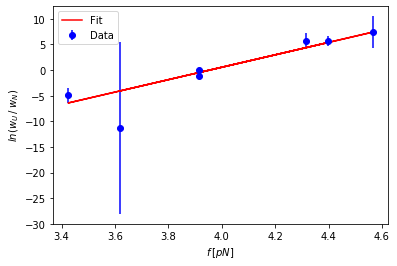

La forza di coesistenza vale f_c = 3.9541779168584936, con sigma = 0.6960816752672372
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 12.123981589088245, con sigma = 1.5141449272248775
La differenza di energia libera DeltaG_NU = 47.94038026397169, con sigma = 5.947682382160325


In [49]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [50]:
G0 = grafici.G0(f_c)

DeltaG0 = 30.180361231425458, con sigma = 3.5545383770513994


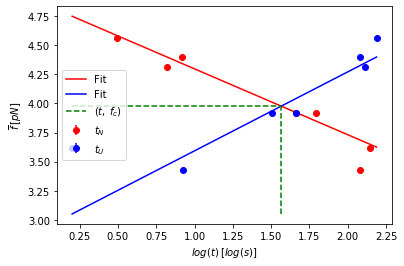

Stimiamo i parametri del fit lineare: m1 = -0.5658190577601124, con incertezza = 0.00452108930550823, 
 q1 = 4.862772934765369, con incertezza = 0.006561570515455225
Stimiamo i parametri del fit lineare: m2 = 0.6783916700347483, con incertezza = 0.005647987048843766, 
 q2 = 2.9140564704151295, con incertezza = 0.010104409867557023
La forza di coesistenza qui vale: fc = 3.976571836295123, con incertezza = 0.008062489046296006
Il tempo medi di residenza vale: tc = 4.788546990538825, con incertezza = 0.06365399613302863
Stimiamo un nuovo DeltaG_NU = 48.2118837309289, con incertezza = 6.021899476830172


((-0.5658190577601124, 0.00452108930550823),
 (4.862772934765369, 0.006561570515455225),
 (0.6783916700347483, 0.005647987048843766),
 (2.9140564704151295, 0.010104409867557023),
 (3.976571836295123, 0.008062489046296006),
 (4.788546990538825, 0.06365399613302863),
 (48.2118837309289, 6.021899476830172))

In [51]:
grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

# Eliminiamo il punto con maggiore incertezza

In [52]:
def remove_element(arr, pos):
    arr.pop(pos)
    return arr

In [53]:
# proviamo ad eliminare il pimo punto, quello più in alto
forces_average = remove_element(forces_average, 0)
forces_average_std = remove_element(forces_average_std, 0)
w_U = remove_element(w_U, 0)
w_N = remove_element(w_N, 0)
sigma_w_U = remove_element(sigma_w_U, 0)
sigma_w_N = remove_element(sigma_w_N, 0)
native_time = remove_element(native_time, 0)
unfolded_time = remove_element(unfolded_time, 0)

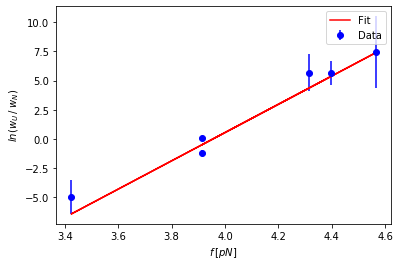

La forza di coesistenza vale f_c = 3.9541625745445934, con sigma = 0.697394947760243
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 12.105848763664508, con sigma = 1.514730311072033
La differenza di energia libera DeltaG_NU = 47.86849411437913, con sigma = 5.950024562431057


In [54]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [55]:
f_c

(3.9541625745445934, 0.697394947760243)

In [56]:
G0 = grafici.G0(f_c)

DeltaG0 = 30.18016873462468, con sigma = 3.5611963850506103


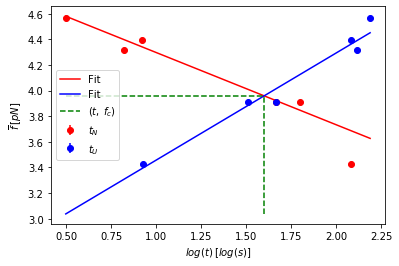

Stimiamo i parametri del fit lineare: m1 = -0.5637229750147782, con incertezza = 0.004638936970955862, 
 q1 = 4.8606355519265, con incertezza = 0.006646552248227499
Stimiamo i parametri del fit lineare: m2 = 0.8361806500162844, con incertezza = 0.006748720172713896, 
 q2 = 2.6219428399375793, con incertezza = 0.012201066058281586
La forza di coesistenza qui vale: fc = 3.959143125461576, con incertezza = 0.008855708274841213
Il tempo medi di residenza vale: tc = 4.948954335781927, con incertezza = 0.06749866690694804
Stimiamo un nuovo DeltaG_NU = 47.92878791053985, con incertezza = 5.997992253261875


In [57]:
m1, q_1, m2, q_2, f_c, t_c, DeltaGNU = grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

In [58]:
f_c, t_c

((3.959143125461576, 0.008855708274841213),
 (4.948954335781927, 0.06749866690694804))

### Tolgo un altro punto

In [59]:
forces_average, native_time

([4.396948370446181,
  4.315634622749954,
  3.424699655237795,
  4.56465118711277,
  3.9148054509749075,
  3.914745550031145],
 [2.512, 2.2680000000000002, 7.998, 1.6440000000000001, 6.025, 5.273])

In [60]:
# proviamo ad eliminare il pimo punto, quello più in alto
forces_average = remove_element(forces_average, 4)
forces_average_std = remove_element(forces_average_std, 4)
w_U = remove_element(w_U, 4)
w_N = remove_element(w_N, 4)
sigma_w_U = remove_element(sigma_w_U, 4)
sigma_w_N = remove_element(sigma_w_N, 4)
native_time = remove_element(native_time, 4)
unfolded_time = remove_element(unfolded_time, 4)

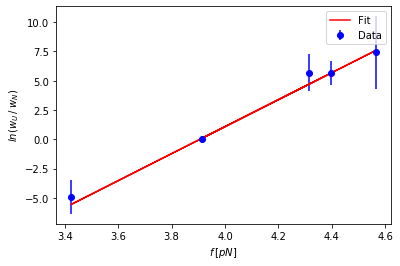

La forza di coesistenza vale f_c = 3.906720636726431, con sigma = 0.7321441779122242
La differenza di lunghezza tra lo stato foldend e unfolded e' x_NU = 11.534429289424827, con sigma = 1.5222092944510888
La differenza di energia libera DeltaG_NU = 45.06179293785775, con sigma = 5.995895781297792


In [61]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

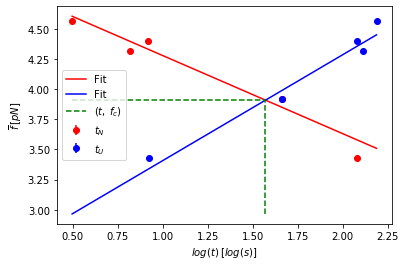

Stimiamo i parametri del fit lineare: m1 = -0.6474961452707274, con incertezza = 0.005819647262164595, 
 q1 = 4.925591448976898, con incertezza = 0.007183366472801748
Stimiamo i parametri del fit lineare: m2 = 0.8778585309498489, con incertezza = 0.007850812142951765, 
 q2 = 2.5288942102416554, con incertezza = 0.015134872218819796
La forza di coesistenza qui vale: fc = 3.9082200483088623, con incertezza = 0.010652642882498342
Il tempo medi di residenza vale: tc = 4.8126088445230355, con incertezza = 0.07170033334279224
Stimiamo un nuovo DeltaG_NU = 45.07908779473106, con incertezza = 5.950397635864738


((-0.6474961452707274, 0.005819647262164595),
 (4.925591448976898, 0.007183366472801748),
 (0.8778585309498489, 0.007850812142951765),
 (2.5288942102416554, 0.015134872218819796),
 (3.9082200483088623, 0.010652642882498342),
 (4.8126088445230355, 0.07170033334279224),
 (45.07908779473106, 5.950397635864738))

In [62]:
grafici.residence_time(native_time, unfolded_time, forces_average, forces_average_std)

In [63]:
grafici.write_on_txt()